## Importing libraries

In [1]:
# Watching for changes in modules
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import (
    layers,
    models,
    datasets,
    callbacks,
    losses,
    utils,
    optimizers,
    metrics,
)

from scipy.stats import norm
from scripts.utils import display, sample_batch, preprocess

## Preparing Data

### Loading and Initial Exploration of the Dataset

In [2]:
from tensorflow.keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="coarse")

In [3]:
coarse_classes = [
    "aquatic mammals", "fish", "flowers", "food containers", "fruit and vegetables",
    "household electrical devices", "household furniture", "insects", "large carnivores",
    "large man-made outdoor things", "large natural outdoor scenes", "large omnivores and herbivores",
    "medium-sized mammals", "non-insect invertebrates", "people", "reptiles",
    "small mammals", "trees", "vehicles 1", "vehicles 2"
]

print("Coarse classes (20):", coarse_classes)

Coarse classes (20): ['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2']


In [4]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


### Setting parameters

In [5]:
IMAGE_SIZE = x_train.shape[1]
CHANNELS = x_train.shape[3]
BATCH_SIZE = 100
BUFFER_SIZE = 1000
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 2

### Preprocessing

In [6]:
x_train = preprocess(x_train)
x_test = preprocess(x_test)

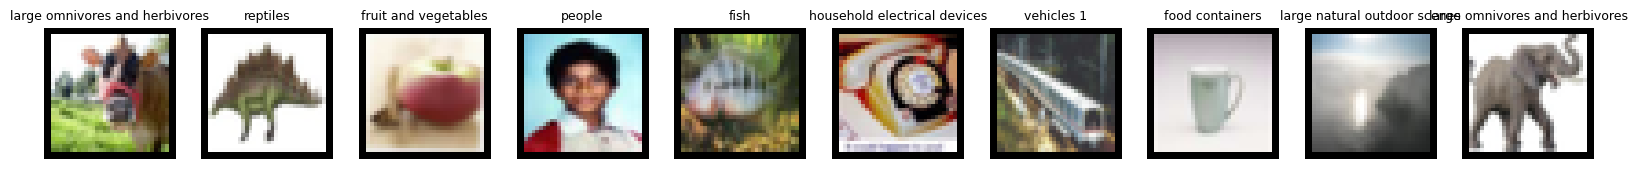

In [7]:
display(x_train, labels=y_train.squeeze(), class_names=coarse_classes, n=10)